In [1]:
# Dependencies
import json
import requests
import os
import pandas as pd
import gmaps
import matplotlib.pyplot as plt
from oc_key import oc_key
from oc_key import g_key

gmaps.configure(api_key=g_key) 



In [2]:
# Load city list csv
city_list_toload = "../Resources/weather_city_final.csv"

city_list_df = pd.read_csv(city_list_toload)
city_list_df

,City_State,Clean_City,Population,Lat,Lng,Max Temp,Min Temp
0,"Kansas City, Missouri",Kansas City,481417.0,39.099727,-94.578567,64.99,62.01
1,"Omaha, Nebraska",Omaha,465112.0,41.256537,-95.934503,64.00,59.00
2,"Lincoln, Nebraska",Lincoln,280849.0,40.813616,-96.702596,63.00,62.01
3,"St. Louis, Missouri",St. Louis,311273.0,38.627003,-90.199404,66.00,57.99
4,"Jersey City, New Jersey",Jersey City,261746.0,40.717754,-74.043143,69.01,60.80
...,...,...,...,...,...,...,...
68,"New Orleans, Louisiana",New Orleans,389648.0,29.951066,-90.071532,72.00,69.01
69,"St. Paul, Minnesota",St. Paul,302760.0,44.953703,-93.089958,66.00,60.80
70,"Minneapolis, Minnesota",Minneapolis,416021.0,44.977753,-93.265011,64.99,61.00
71,"Boston, Massachusetts",Boston,679413.0,42.360083,-71.058880,71.01,66.20


In [3]:
lats = city_list_df["Lat"].tolist()
longs = city_list_df["Lng"].tolist()
lats, longs
latlongpair = zip(lats,longs)
#latlongpair

In [4]:
print(latlongpair)



In [5]:
# list to capture station count per city
station_count = []

# Loop through each city and get a count of how many electric charge stations within 50 miles of center lat/long
for latlongpair in latlongpair:
    query_url = f"https://api.openchargemap.io/v3/poi/?output=json&client=DVProject1&countrycode=US&maxresults=3000&distance=50&distanceunit=miles&verbose=false&compact=true&latitude={latlongpair[0]}&longitude={latlongpair[1]}&key={oc_key}"
    charge_data = requests.get(query_url)
    charge_json = charge_data.json()
    station_count.append(len(charge_json))

#takes several seconds to run

In [6]:
station_count

[363,
 45,
 52,
 133,
 1178,
 232,
 235,
 1164,
 41,
 144,
 271,
 1187,
 368,
 393,
 191,
 142,
 126,
 134,
 235,
 103,
 93,
 180,
 453,
 612,
 6,
 76,
 148,
 615,
 47,
 367,
 25,
 3,
 599,
 384,
 164,
 619,
 106,
 123,
 529,
 528,
 91,
 846,
 2890,
 690,
 1623,
 700,
 2960,
 217,
 1936,
 546,
 89,
 570,
 2766,
 1748,
 1925,
 615,
 2840,
 2966,
 474,
 366,
 455,
 371,
 791,
 143,
 569,
 35,
 34,
 1091,
 67,
 269,
 271,
 780,
 272]

In [7]:
# Add station count to the data frame and kick out a CSV
city_list_df["Number of Stations"] = station_count
#city_list_df.to_csv('Results/station_count_by_city.csv', index=False)
city_list_df

,City_State,Clean_City,Population,Lat,Lng,Max Temp,Min Temp,Number of Stations
0,"Kansas City, Missouri",Kansas City,481417.0,39.099727,-94.578567,64.99,62.01,363
1,"Omaha, Nebraska",Omaha,465112.0,41.256537,-95.934503,64.00,59.00,45
2,"Lincoln, Nebraska",Lincoln,280849.0,40.813616,-96.702596,63.00,62.01,52
3,"St. Louis, Missouri",St. Louis,311273.0,38.627003,-90.199404,66.00,57.99,133
4,"Jersey City, New Jersey",Jersey City,261746.0,40.717754,-74.043143,69.01,60.80,1178
...,...,...,...,...,...,...,...,...
68,"New Orleans, Louisiana",New Orleans,389648.0,29.951066,-90.071532,72.00,69.01,67
69,"St. Paul, Minnesota",St. Paul,302760.0,44.953703,-93.089958,66.00,60.80,269
70,"Minneapolis, Minnesota",Minneapolis,416021.0,44.977753,-93.265011,64.99,61.00,271
71,"Boston, Massachusetts",Boston,679413.0,42.360083,-71.058880,71.01,66.20,780


In [8]:
# Get stations per 1k pop data
pop1k = city_list_df["Population"]/1000

city_list_df["Stations per 1k Population"] = pop1k/station_count
#city_list_df.to_csv('Results/station_count_per1kpop.csv', index=False)
city_list_df

,City_State,Clean_City,Population,Lat,Lng,Max Temp,Min Temp,Number of Stations,Stations per 1k Population
0,"Kansas City, Missouri",Kansas City,481417.0,39.099727,-94.578567,64.99,62.01,363,1.326218
1,"Omaha, Nebraska",Omaha,465112.0,41.256537,-95.934503,64.00,59.00,45,10.335822
2,"Lincoln, Nebraska",Lincoln,280849.0,40.813616,-96.702596,63.00,62.01,52,5.400942
3,"St. Louis, Missouri",St. Louis,311273.0,38.627003,-90.199404,66.00,57.99,133,2.340398
4,"Jersey City, New Jersey",Jersey City,261746.0,40.717754,-74.043143,69.01,60.80,1178,0.222195
...,...,...,...,...,...,...,...,...,...
68,"New Orleans, Louisiana",New Orleans,389648.0,29.951066,-90.071532,72.00,69.01,67,5.815642
69,"St. Paul, Minnesota",St. Paul,302760.0,44.953703,-93.089958,66.00,60.80,269,1.125502
70,"Minneapolis, Minnesota",Minneapolis,416021.0,44.977753,-93.265011,64.99,61.00,271,1.535133
71,"Boston, Massachusetts",Boston,679413.0,42.360083,-71.058880,71.01,66.20,780,0.871042


In [9]:
# Get stations per mile using area of 50-mile radius circle, 7,854 miles
permile = city_list_df["Number of Stations"]

city_list_df["Stations per mile"] = (city_list_df["Number of Stations"])/7854
#city_list_df.to_csv('Results/station_count_permile.csv', index=False)
city_list_df

,City_State,Clean_City,Population,Lat,Lng,Max Temp,Min Temp,Number of Stations,Stations per 1k Population,Stations per mile
0,"Kansas City, Missouri",Kansas City,481417.0,39.099727,-94.578567,64.99,62.01,363,1.326218,0.046218
1,"Omaha, Nebraska",Omaha,465112.0,41.256537,-95.934503,64.00,59.00,45,10.335822,0.005730
2,"Lincoln, Nebraska",Lincoln,280849.0,40.813616,-96.702596,63.00,62.01,52,5.400942,0.006621
3,"St. Louis, Missouri",St. Louis,311273.0,38.627003,-90.199404,66.00,57.99,133,2.340398,0.016934
4,"Jersey City, New Jersey",Jersey City,261746.0,40.717754,-74.043143,69.01,60.80,1178,0.222195,0.149987
...,...,...,...,...,...,...,...,...,...,...
68,"New Orleans, Louisiana",New Orleans,389648.0,29.951066,-90.071532,72.00,69.01,67,5.815642,0.008531
69,"St. Paul, Minnesota",St. Paul,302760.0,44.953703,-93.089958,66.00,60.80,269,1.125502,0.034250
70,"Minneapolis, Minnesota",Minneapolis,416021.0,44.977753,-93.265011,64.99,61.00,271,1.535133,0.034505
71,"Boston, Massachusetts",Boston,679413.0,42.360083,-71.058880,71.01,66.20,780,0.871042,0.099312


In [10]:
city_list_df = city_list_df.sort_values("Number of Stations", ascending=False)
city_list_df.to_csv('Results/citylist_sorted_stationct.csv', index=False)
city_list_df.head(20)

,City_State,Clean_City,Population,Lat,Lng,Max Temp,Min Temp,Number of Stations,Stations per 1k Population,Stations per mile
57,"Los Angeles, California",Los Angeles,3959657.0,34.052234,-118.243685,57.20,46.99,2966,1.335016,0.377642
46,"Anaheim, California",Anaheim,349668.0,33.836593,-117.914301,57.20,52.00,2960,0.118131,0.376878
42,"Long Beach, California",Long Beach,468883.0,33.770050,-118.193740,57.00,53.01,2890,0.162243,0.367965
56,"Santa Ana, California",Santa Ana,333499.0,33.745472,-117.867653,59.00,52.00,2840,0.117429,0.361599
52,"Irvine, California",Irvine,265502.0,33.684567,-117.826505,59.00,52.00,2766,0.095988,0.352177
48,"Oakland, California",Oakland,421042.0,37.804351,-122.271164,64.99,59.00,1936,0.217480,0.246499
54,"San Francisco, California",San Francisco,870044.0,37.774929,-122.419415,51.01,45.00,1925,0.451971,0.245098
53,"San Jose, California",San Jose,1026658.0,37.338208,-121.886329,50.00,46.00,1748,0.587333,0.222562
44,"Riverside, California",Riverside,323935.0,33.980601,-117.375494,63.00,62.01,1623,0.199590,0.206646
11,"New York, New York",New York,8443713.0,40.712775,-74.005973,72.00,60.80,1187,7.113490,0.151133


In [11]:
# Set up a heat map for charging stations
locations = city_list_df[["Lat","Lng"]]
stationct = city_list_df["Number of Stations"].astype(float)
stationspermile = city_list_df["Stations per mile"].astype(float)

In [12]:
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=stationct, dissipating=False, max_intensity=750, point_radius=2)

fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [13]:
# Set up a heat map for charging stations per 1k pop
locations = city_list_df[["Lat","Lng"]]
stationct = city_list_df["Number of Stations"].astype(float)
stationper1k = city_list_df["Stations per 1k Population"].astype(float)

In [14]:
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=stationspermile, dissipating=False, max_intensity=.30, point_radius=2)

fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [15]:
stations = city_list_df["Number of Stations"].tolist()
latitudes = city_list_df["Lat"].tolist()
population = city_list_df["Population"].tolist()
stations_mile = city_list_df["Stations per mile"].tolist()
maxtemp = city_list_df["Max Temp"].tolist()


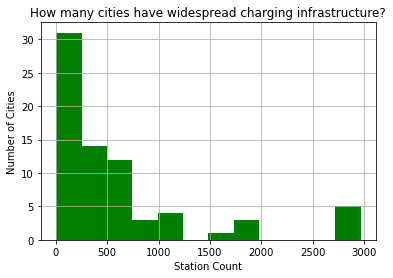

In [16]:
plt.hist(stations, bins=12, color='green')
plt.ylabel("Number of Cities")
plt.xlabel("Station Count")
plt.title("How many cities have widespread charging infrastructure?")
plt.grid(True)
plt.savefig("Results/station_ct_by_cities.png")
plt.show()


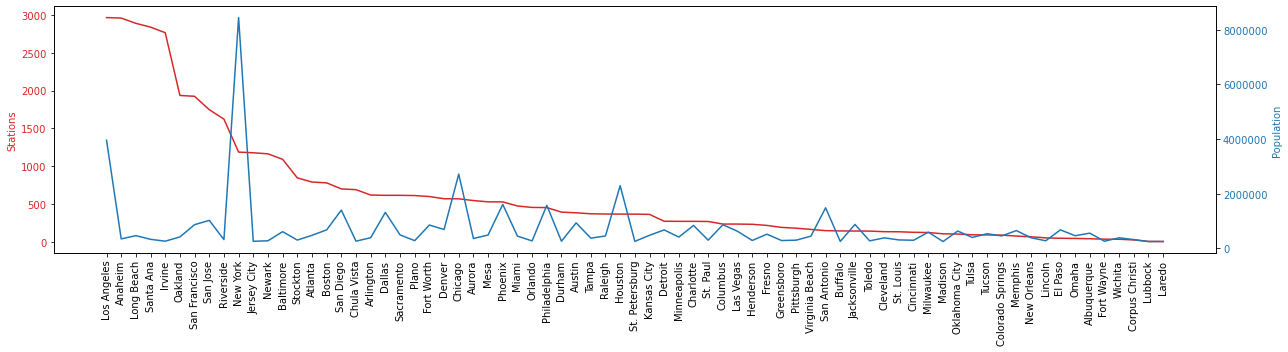

In [17]:
# Generate a figure comparing station count to population
fig, ax1 = plt.subplots(figsize=(18,5))

color = 'tab:red'
#ax1.set_xlabel("City")
ax1.set_ylabel("Stations", color=color)
ax1.plot(city_list_df["Clean_City"], stations, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', labelrotation=90)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Population', color=color)
ax2.plot(city_list_df["Clean_City"], population, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.ticklabel_format(axis='y', style='plain')

fig.tight_layout()
plt.savefig("Results/stations_v_population.png")
plt.show()

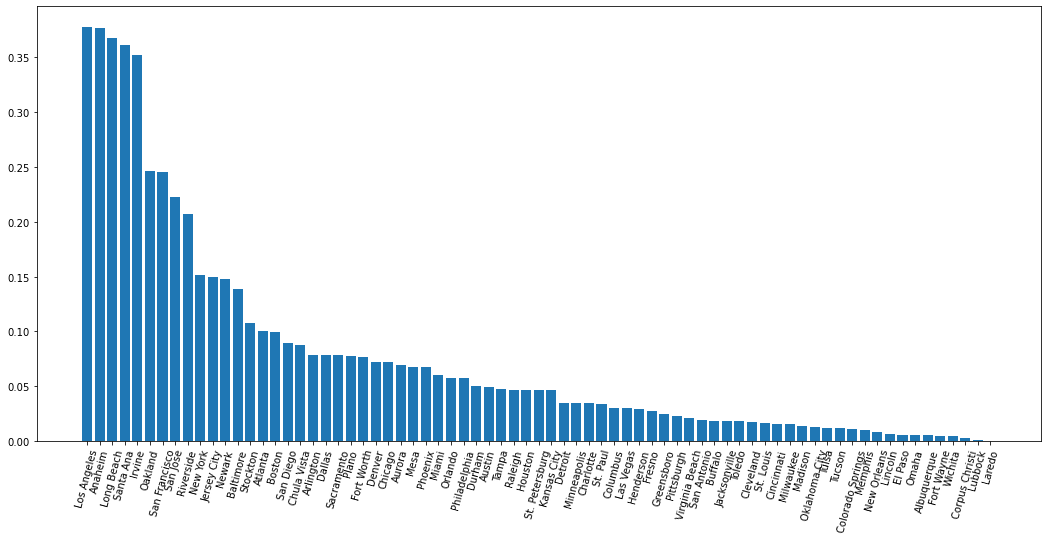

In [18]:
# Stations per mile graphic
plt.figure(figsize=(18,8))
plt.bar(city_list_df["Clean_City"], city_list_df["Stations per mile"])
plt.xticks(rotation=75)
plt.savefig("Results/stations_per_mile.png")
plt.show()